In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'C:\Users\USER\hotel_cancellation_prediction\data\hotel_bookings.csv')

# feature engineering
df['total_nights'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']
df['is_repeated_guest'] = df['is_repeated_guest'].astype(int)


In [3]:
y = df['is_canceled']
X = df.drop(['is_canceled', 'reservation_status', 'reservation_status_date'], axis=1)
X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [4]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [5]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)


RandomForestClassifier(random_state=42)

In [6]:
y_pred = rf_model.predict(X_test_scaled)
y_prob = rf_model.predict_proba(X_test_scaled)[:, 1]

In [7]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.95      0.92     14907
           1       0.90      0.82      0.86      8971

    accuracy                           0.90     23878
   macro avg       0.90      0.88      0.89     23878
weighted avg       0.90      0.90      0.90     23878



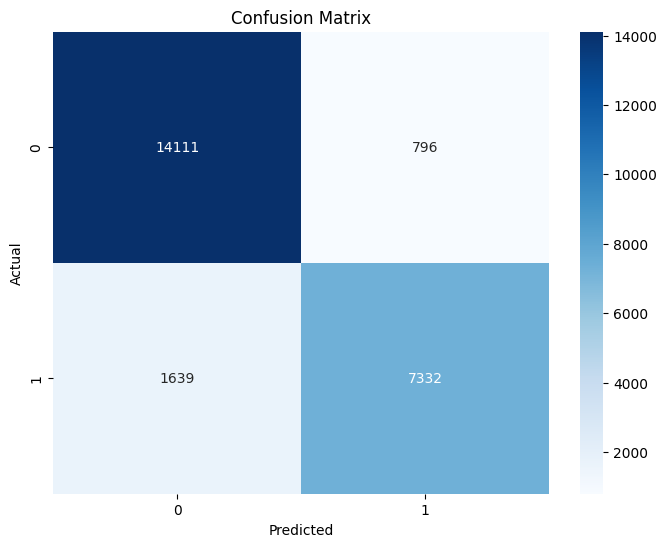

In [8]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

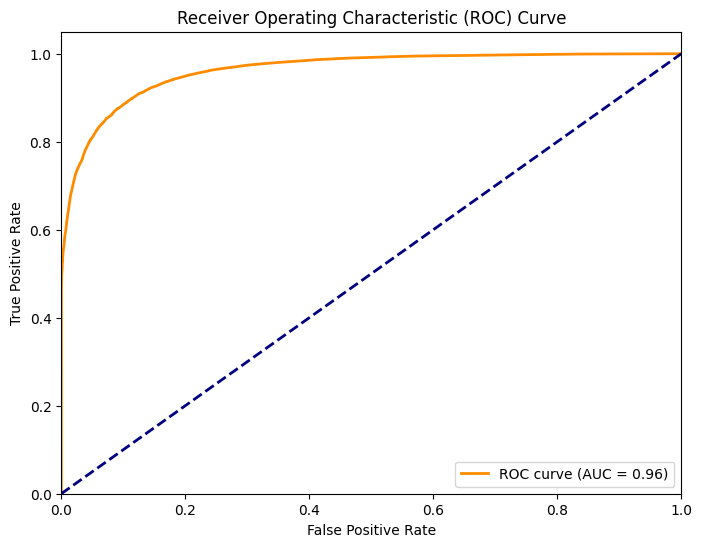

In [9]:
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


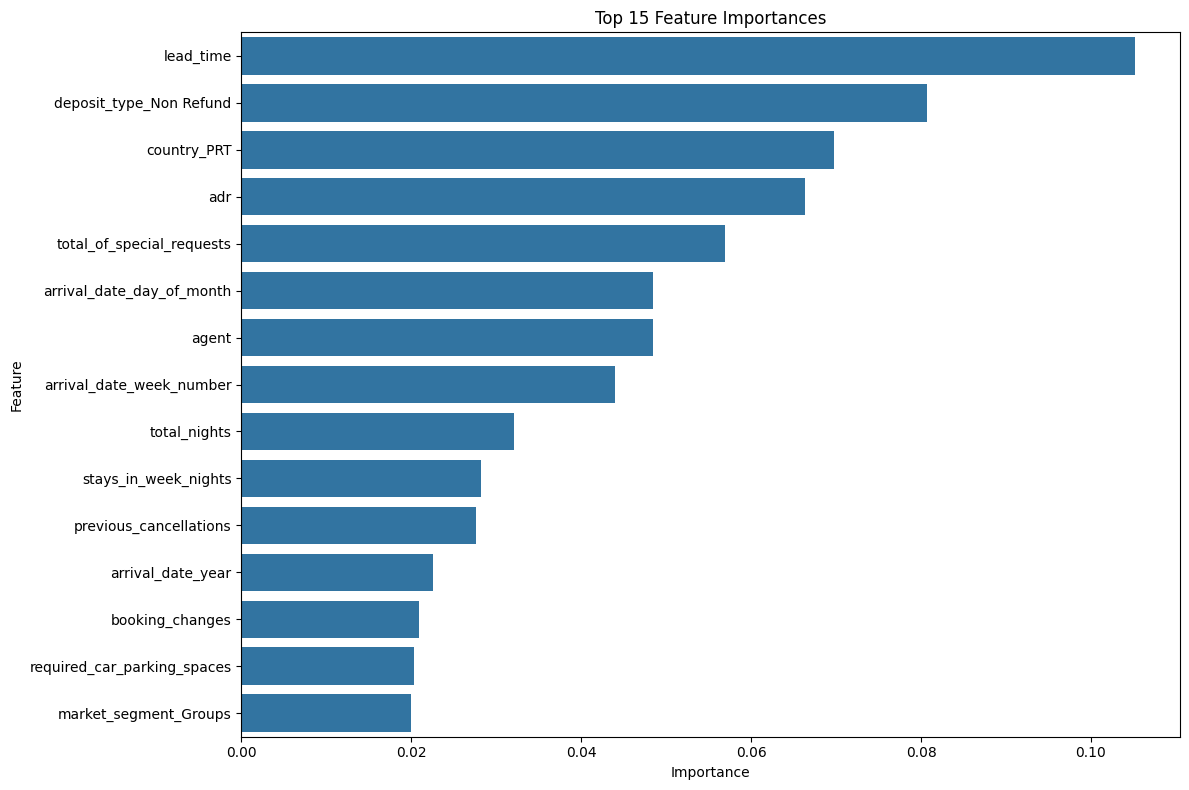


Top 5 most important features:
                       feature  importance
0                    lead_time    0.105222
243    deposit_type_Non Refund    0.080687
170                country_PRT    0.069798
16                         adr    0.066295
18   total_of_special_requests    0.056908

Model analysis completed!


In [10]:
feature_importance = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': feature_importance
}).sort_values('importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=feature_importance_df.head(15))
plt.title('Top 15 Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

print("\nTop 5 most important features:")
print(feature_importance_df.head())

print("\nModel analysis completed!")

In [11]:
import joblib

joblib.dump(rf_model, 'hotel_cancellation_model.joblib')

# scaler
joblib.dump(scaler, 'scaler.joblib')

# Saving feature columns for future reference
import json
with open('feature_columns.json', 'w') as f:
    json.dump(list(X.columns), f)

print("Model and associated files saved successfully!")

Model and associated files saved successfully!
